## Global power plant Database


Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(907, 27)

#### Exploratory Data Analysis

In [5]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
# Checking for Categorical columns

catg_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catg_col.append(i)
print(catg_col)

['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [7]:
# Checking for Numerical Columns

num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print(num_col)

['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [9]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [10]:
# Checking for the value counts

for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

IND    907
Name: country, dtype: int64
**********************************
India    907
Name: country_long, dtype: int64
**********************************
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
**********************************
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
**********************************
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
***********

In [11]:
# Dropping the unnecessary columns


df = df.drop(["other_fuel3"],axis=1)
df = df.drop(["wepp_id"],axis=1)
df=df.drop(["generation_gwh_2013"],axis=1)
df=df.drop(["generation_gwh_2019"],axis=1)
df = df.drop(["estimated_generation_gwh"],axis=1)
df = df.drop(["other_fuel2"],axis=1)


In [12]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [13]:
df = df.drop(["country"],axis=1)
df = df.drop(["country_long"],axis=1)
df = df.drop(["year_of_capacity_data"],axis=1)
df = df.drop(["generation_data_source"],axis=1)
df = df.drop(["name"],axis=1)
df = df.drop(["gppd_idnr"],axis=1)
df = df.drop(["url"],axis=1)
df = df.drop(["owner"],axis=1)

In [14]:
#lets check entries in source column
df["source"].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [15]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [16]:
# Checking the null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

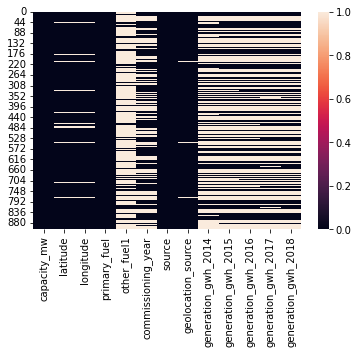

In [17]:
# Visualize the null values

sns.heatmap(df.isnull())

The white lines represent the missing values 

In [18]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [19]:
#Lets extract Power_plant_age from commissioning_year by subtracting it from 2018
df['Power_plant_age'] = 2019 - df['commissioning_year']
df.drop(columns=["commissioning_year"],inplace=True)

### Treating the null values using imputation techniques

These are the values which are highly repeated in the columns. The missing values will be replaced by their respective mode values.

In [20]:
#Replacing NaN values in numerical columns
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["Power_plant_age"] = df["Power_plant_age"].fillna(df["Power_plant_age"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [21]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [22]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
Power_plant_age        0
dtype: int64

<AxesSubplot:>

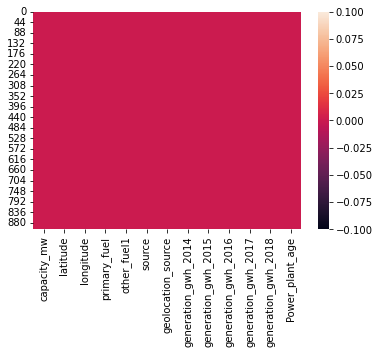

In [23]:
sns.heatmap(df.isnull())

In [24]:
# Checking The uniqueness of primary fuel
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [25]:
# Checking The uniqueness of capacity_mw
df["capacity_mw"].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [26]:
df["primary_fuel"].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [27]:
df["capacity_mw"].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [28]:
# Checking the dataset for the Space

df.loc[df['primary_fuel']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


There is no Space left in the Dataset

In [29]:
# Checking the dataset for the Space

df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


### Description of the Dataset

In [30]:
# Statistical summary of the Dataset

df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


The counts of all the columns are same which means there are no null values present in the dataset.
The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.
There is a huge difference in max and 75% percentile which means there are outliers present in the dataset.

In [31]:
# checking for categorical columns
catg1_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        catg1_col.append(i)
print(catg1_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [32]:
# Now checking for numerical columns
num1_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num1_col.append(i)
print(num1_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


### Data Visualization

#### Univariate Analysis

Plotting the Categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


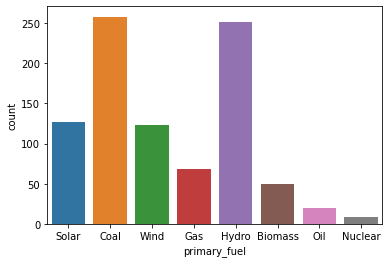

In [33]:
# Visualising the fuel in primary_fuel
print(df["primary_fuel"].value_counts())
sns.countplot(df["primary_fuel"])
plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


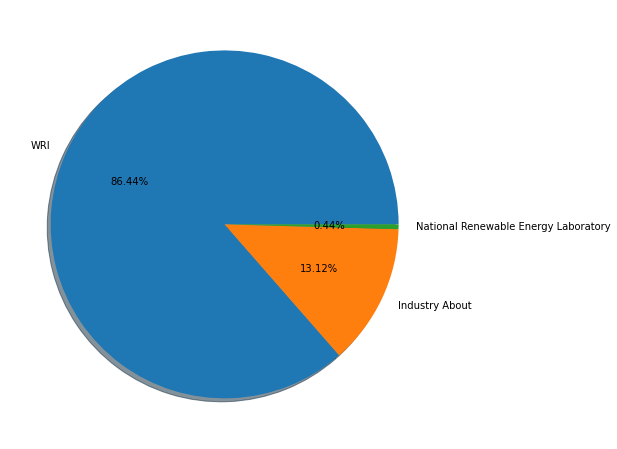

In [34]:
# Visualising the count the applicants Gender
print(df["geolocation_source"].value_counts())
labels= 'WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(),labels=labels, autopct = '%1.2f%%', shadow=True)
plt.show()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


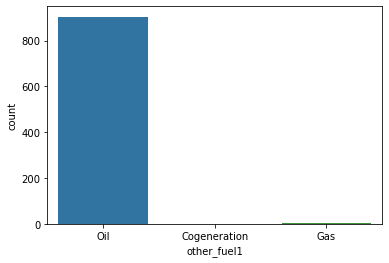

In [35]:
# Visualizing the count of Married
print(df["other_fuel1"].value_counts())
sns.countplot(df["other_fuel1"])
plt.show()

### Distribution of Skewness

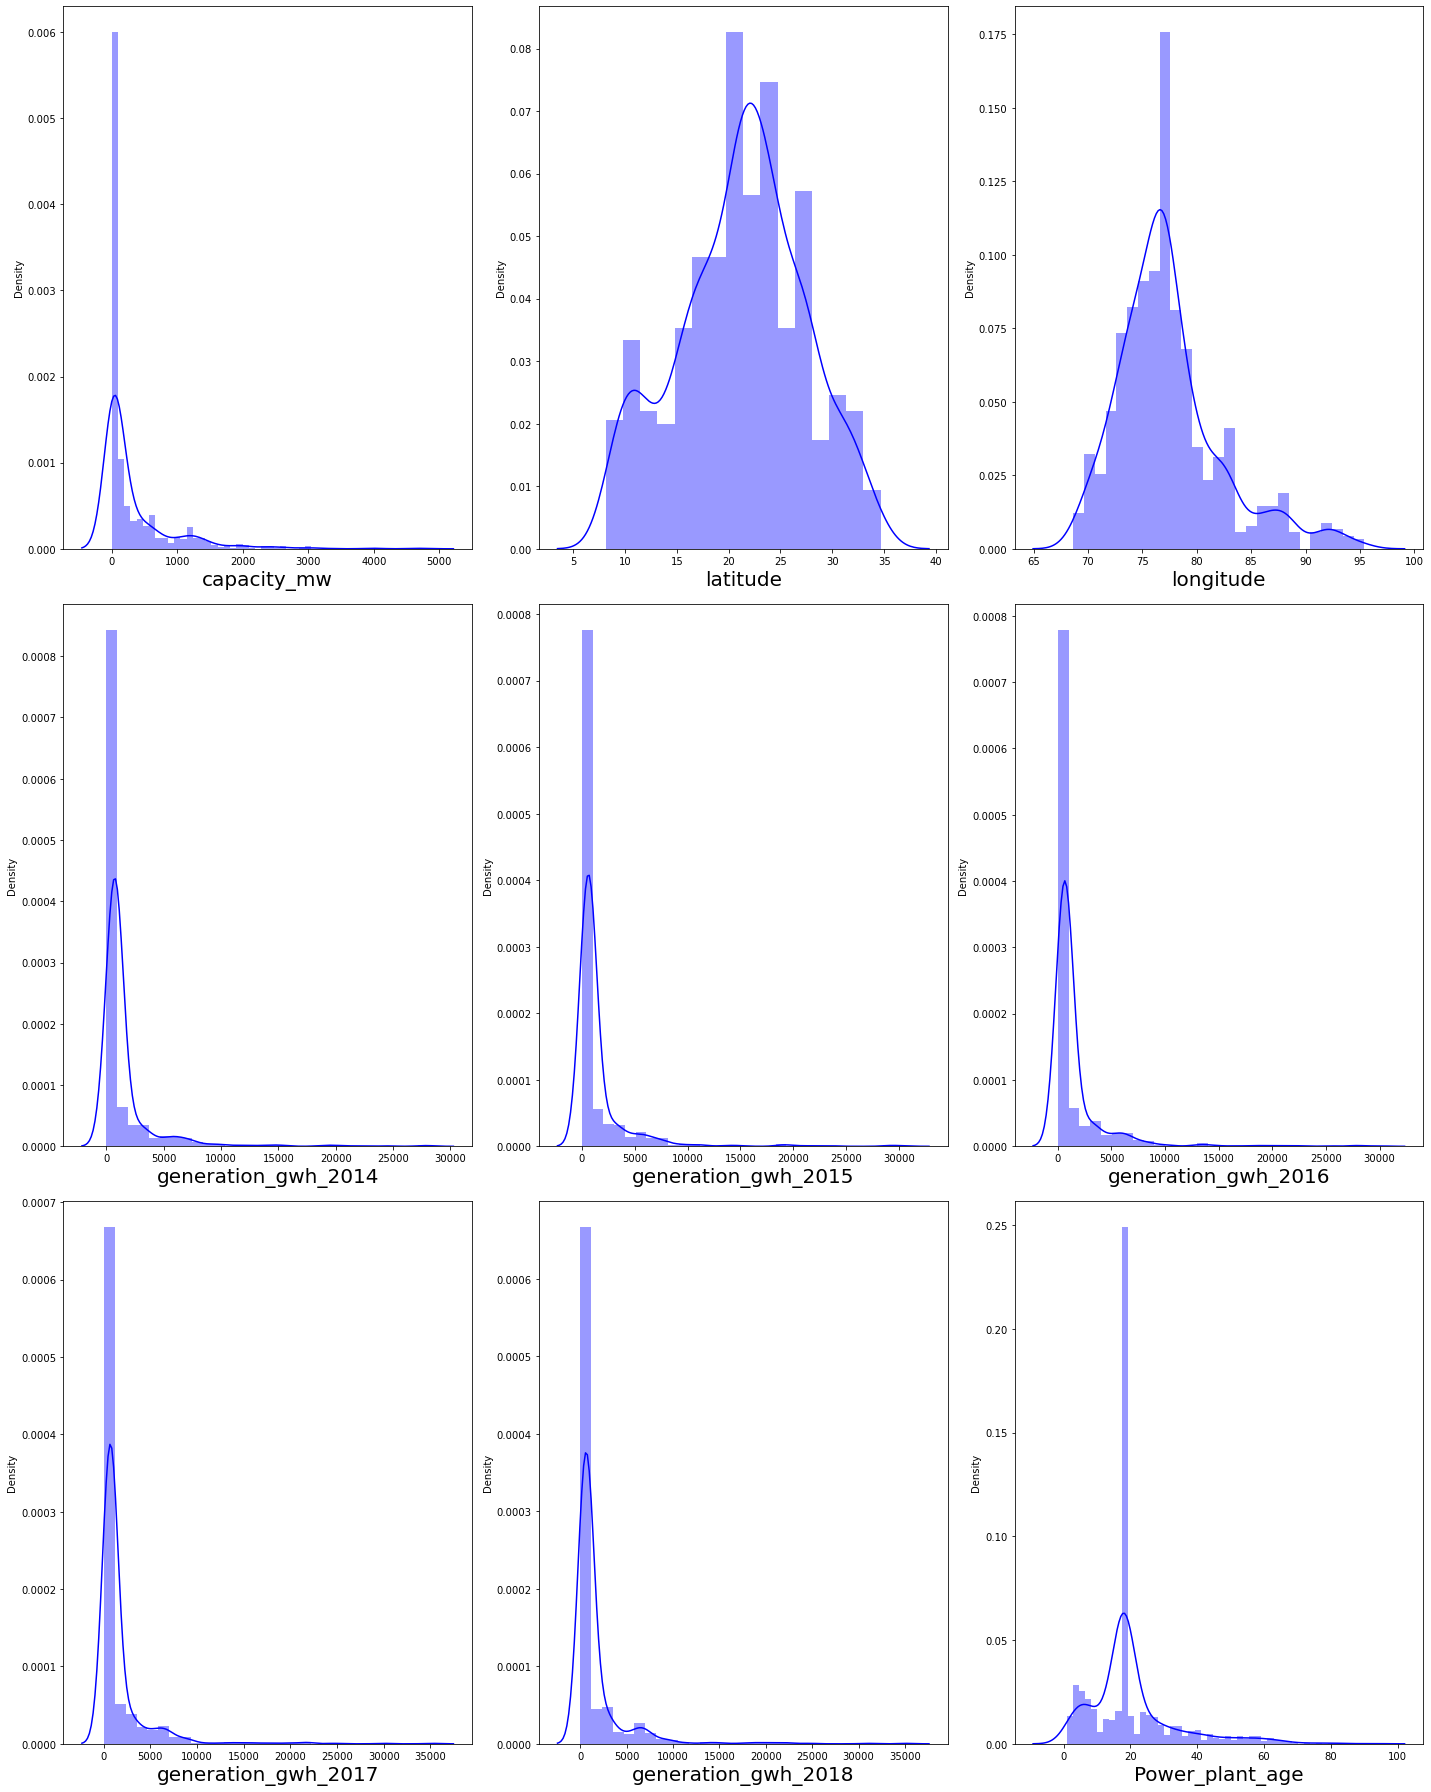

In [36]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num1_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="blue")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Bivariate Analysis

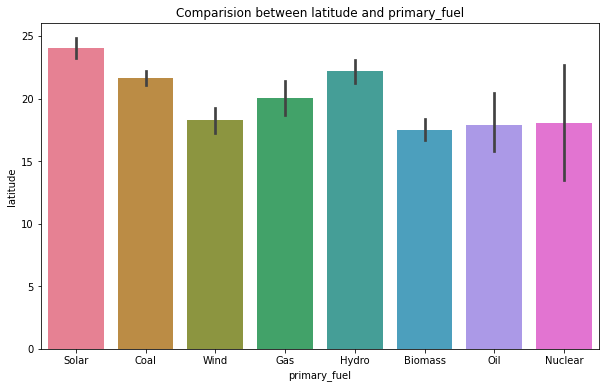

In [37]:
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'],df["latitude"],palette="husl");

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

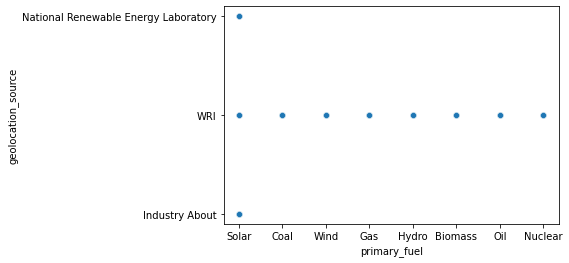

In [38]:
sns.scatterplot(x='primary_fuel',y='geolocation_source',data=df,palette="husl")

From the above plot we can observe that the geolocation_source WRI uses all types of primary fuel the National Renewable Energy Laboratory and the Industry about uses only solar.

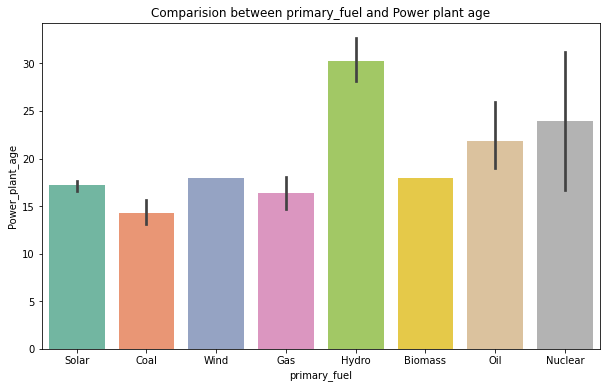

In [39]:
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age")
sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

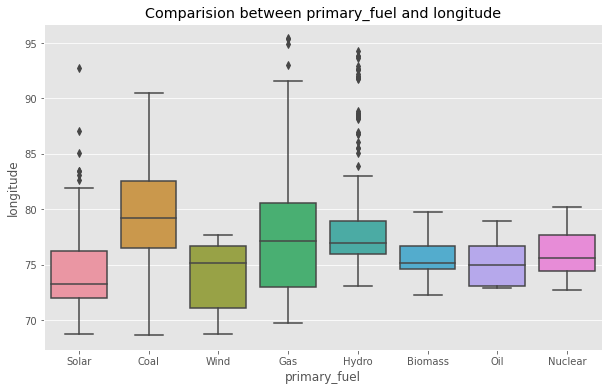

In [40]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between primary_fuel and longitude')
sns.boxplot(df['primary_fuel'],df["longitude"]);

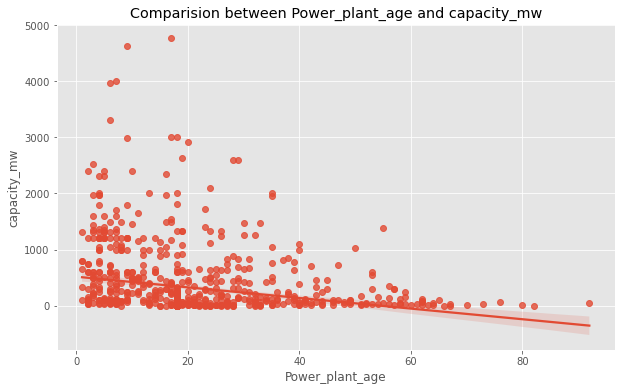

In [41]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw']);

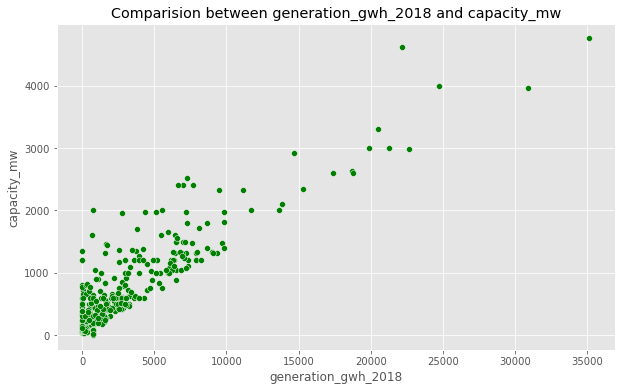

In [42]:
#Lets check the capacity of the plant in generation_gwh_2013
plt.figure(figsize = (10,6))
plt.title("Comparision between generation_gwh_2018 and capacity_mw")
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw", data = df,color="g")
plt.show()

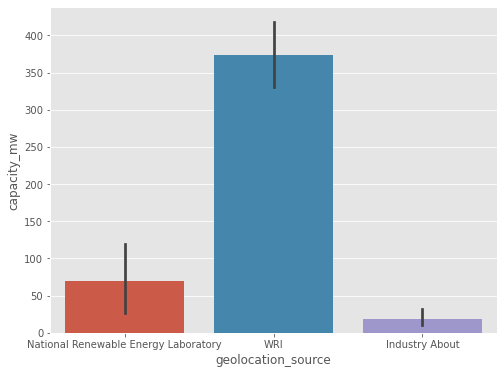

In [43]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

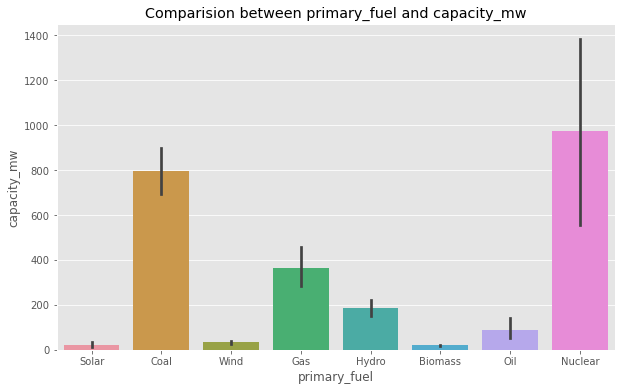

In [44]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and capacity_mw")
sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()

### Multivariate Analysis

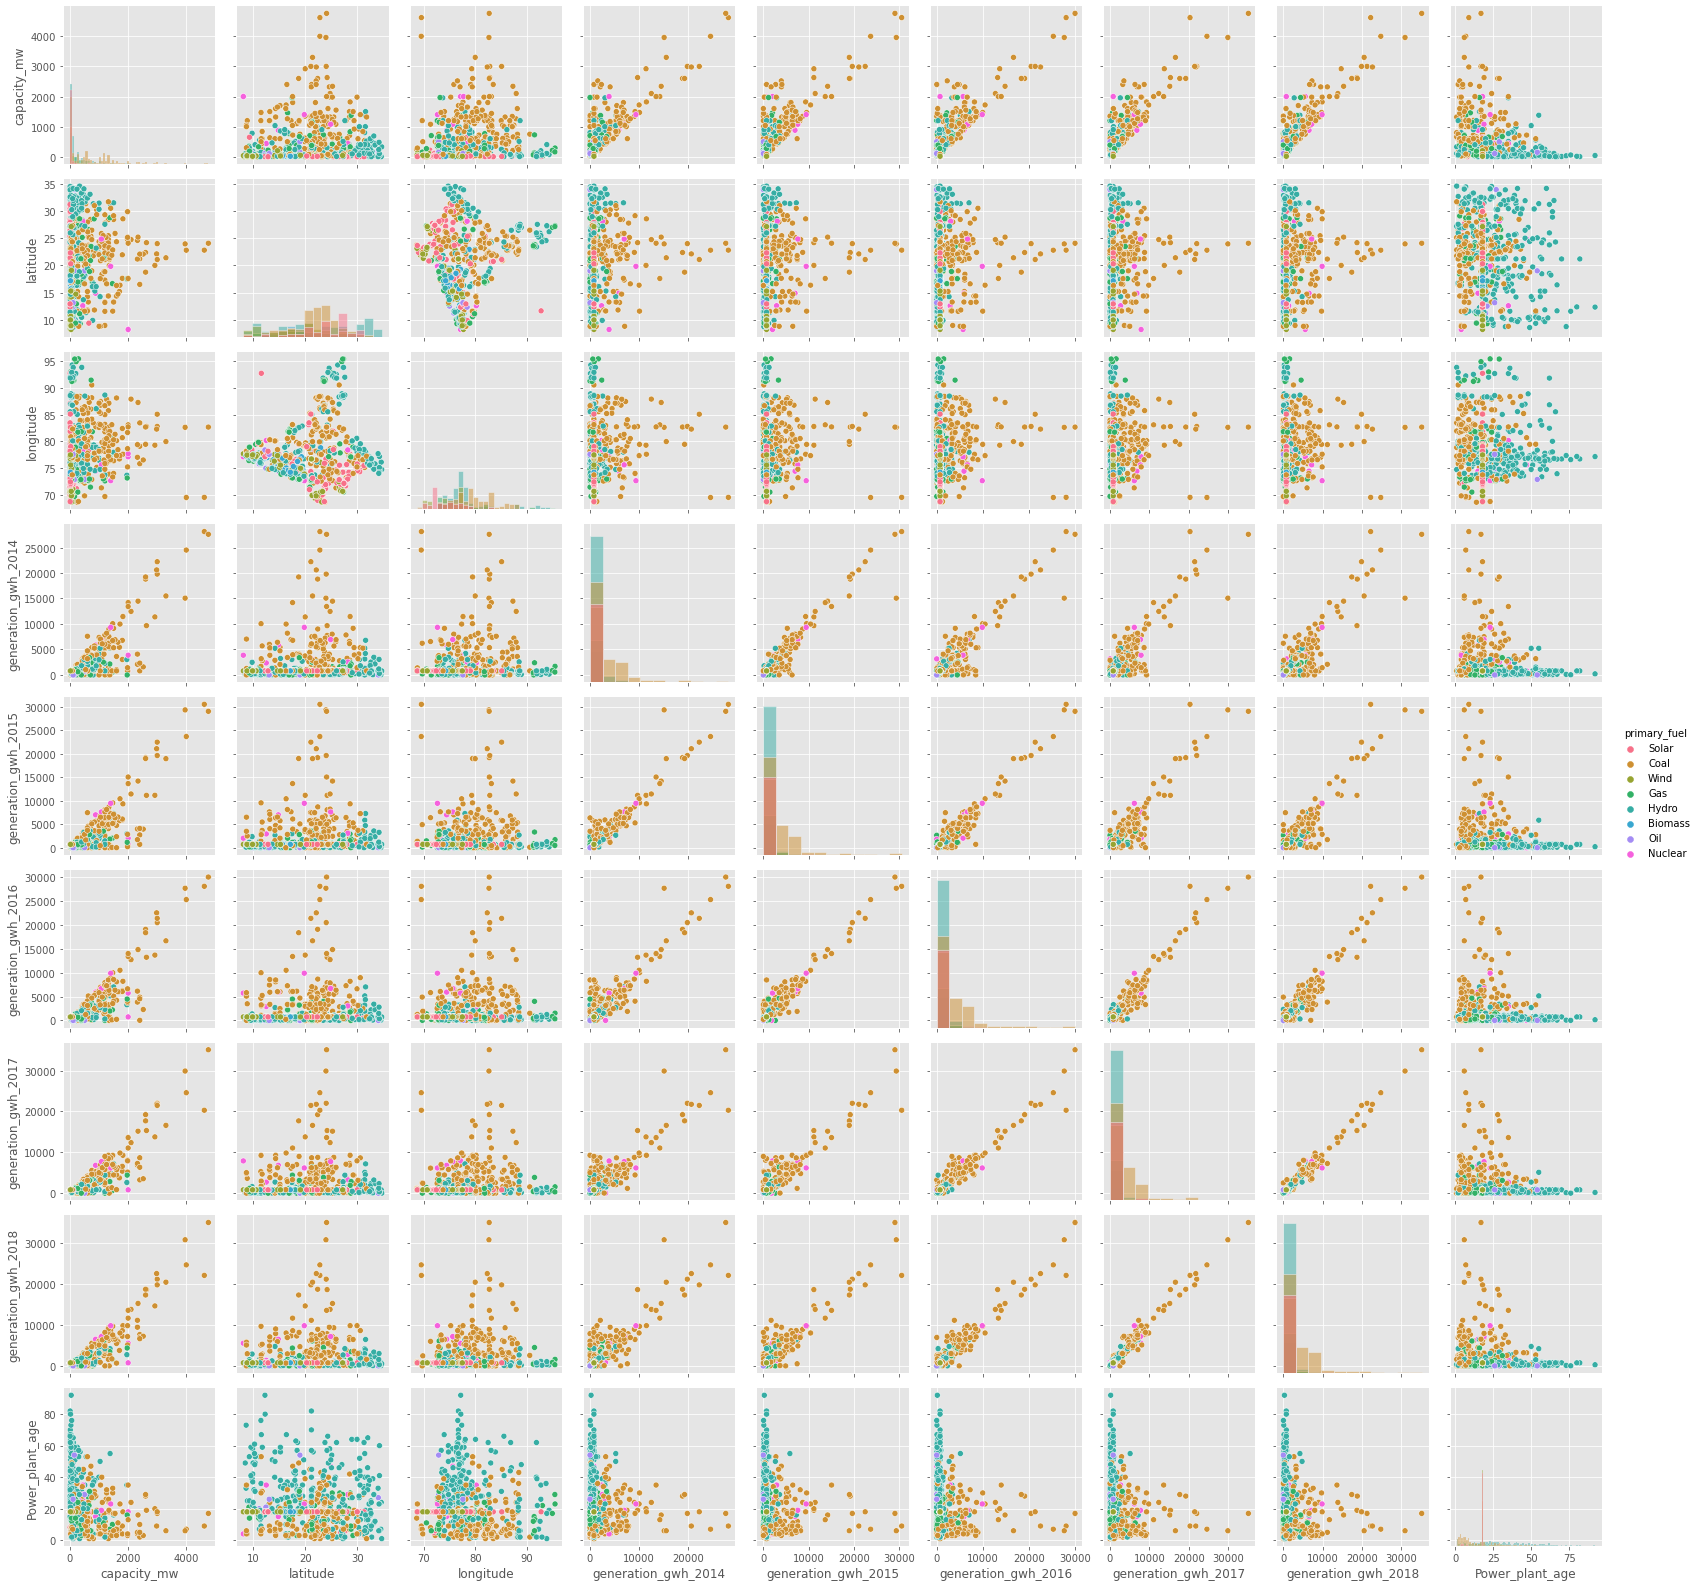

In [45]:
# Checking the pairwise relation between the features and label capacity in megawatt.
g = sns.PairGrid(df, hue="primary_fuel")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

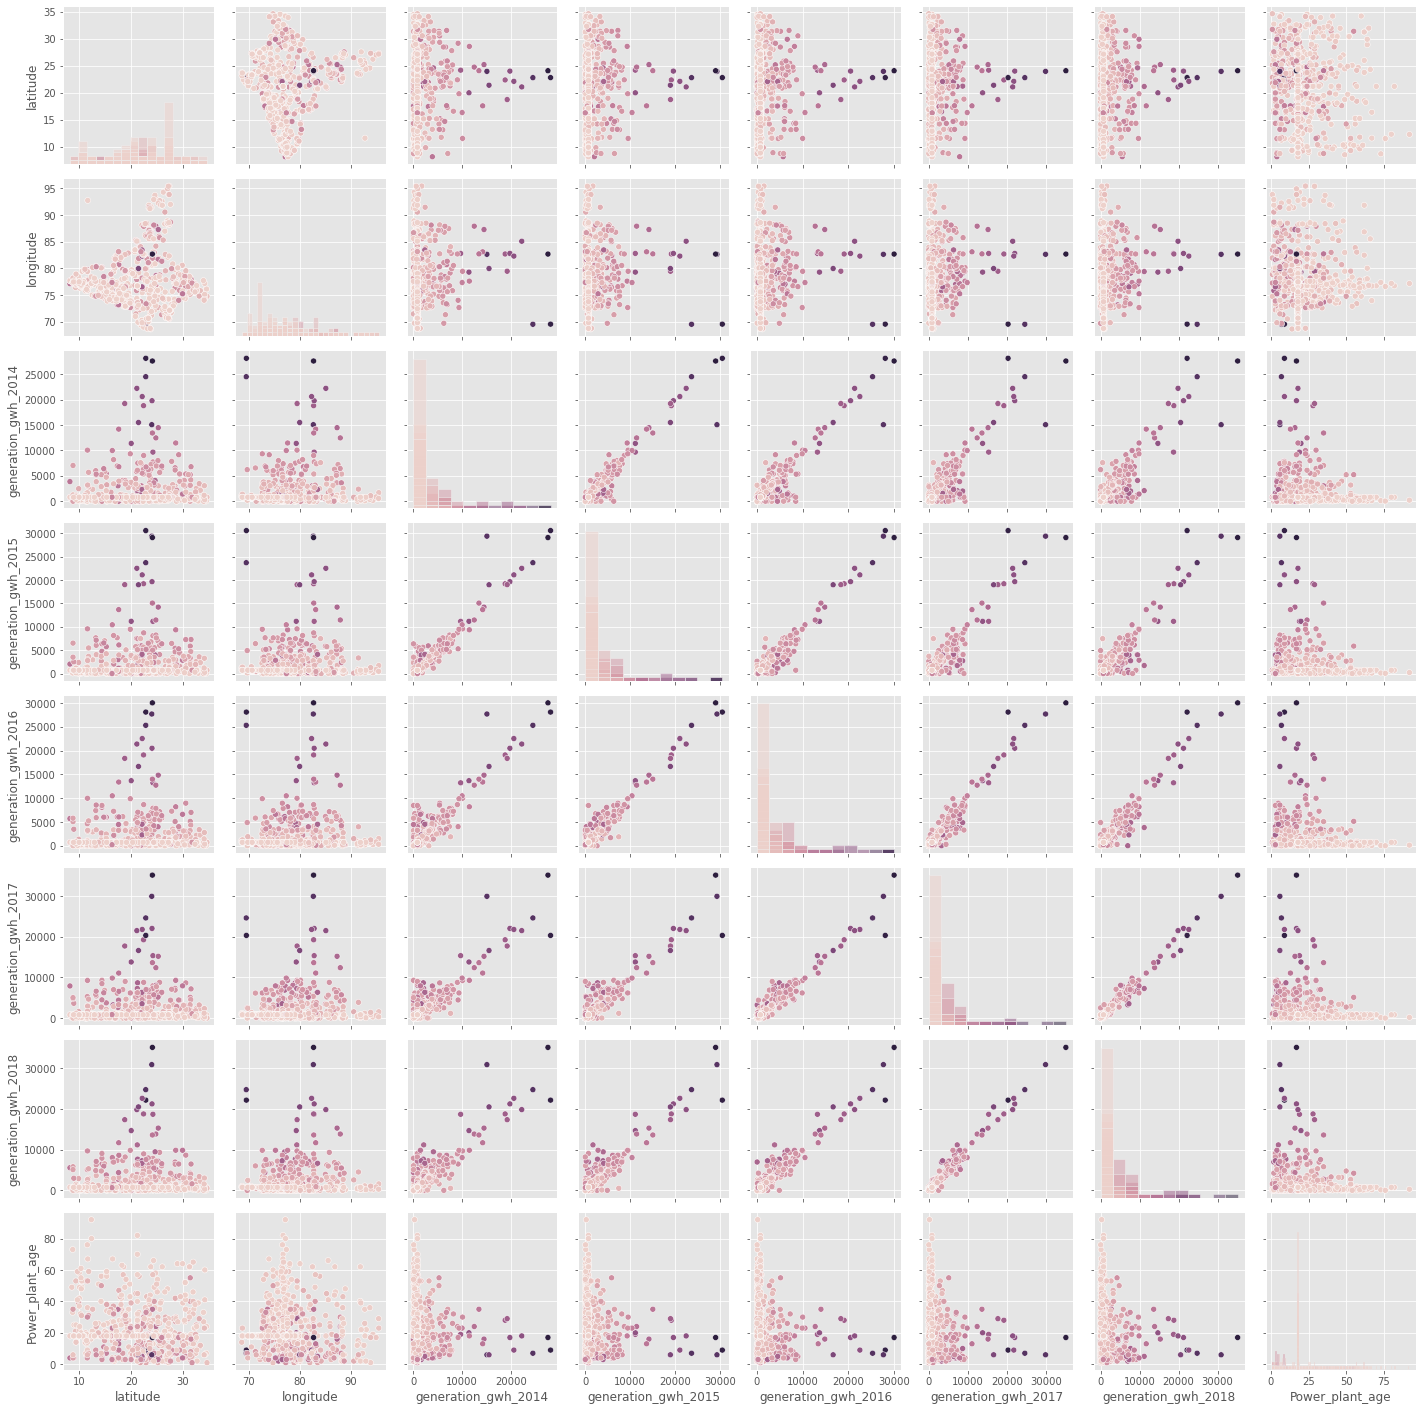

In [46]:
g = sns.PairGrid(df,hue="capacity_mw")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### Identifying the Outliers

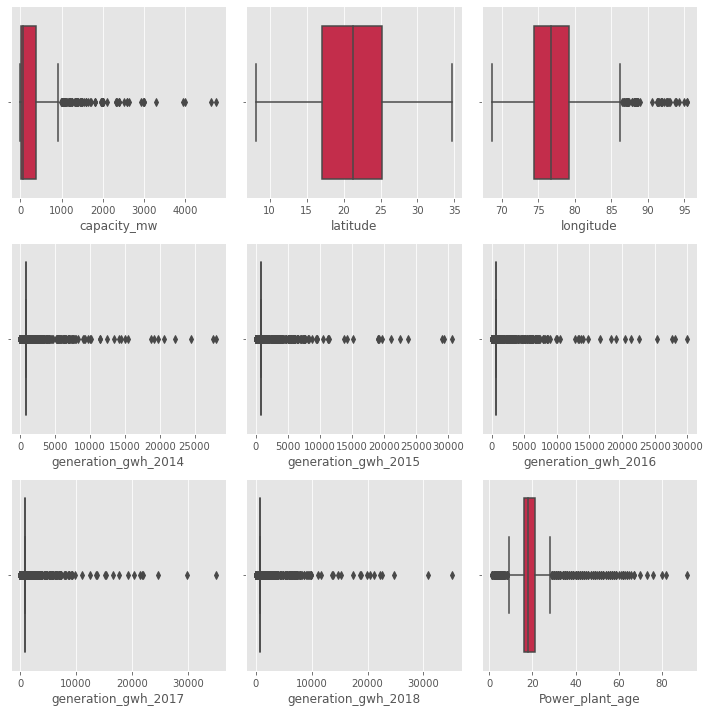

In [47]:
# Identifying the outliers in numerical columns using boxplot

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in num1_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="crimson")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

### Removing Outliers

i) Z Score method

In [48]:
# The credit_history column no need to remove outliers
# removing from other four

features = df[['longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

# Using Zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [49]:
new_df=df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


Removed the outliers whose Zscore is less than 3

In [50]:
# original dataset shape
df.shape

(907, 13)

In [51]:
# new dataframe shape
new_df.shape

(851, 13)

In [52]:
# Checking the data loss
data_loss =(907-851)/907*100
data_loss

6.174200661521499

ii) Inter Quantile Method

In [53]:
# 1st Quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

# IQR

IQR = Q3-Q1

df1 = df[~((df<(Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [54]:
df1.shape

(420, 13)

In [55]:
# Data_loss in IQR Method
data_loss1 = (907-420)/907*100
data_loss1

53.69349503858876

In Zscore method the data loss was 6% and in this method we get 53%. So preferring the Zscore method

### Checking for Skewness

In [56]:
new_df.skew()

capacity_mw            2.170245
latitude              -0.119551
longitude              0.945877
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

### Removing skewness 

In [57]:
skew=['capacity_mw','longitude',  'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [58]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


In [59]:
new_df.skew()

capacity_mw            0.016303
latitude              -0.119551
longitude             -0.000128
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

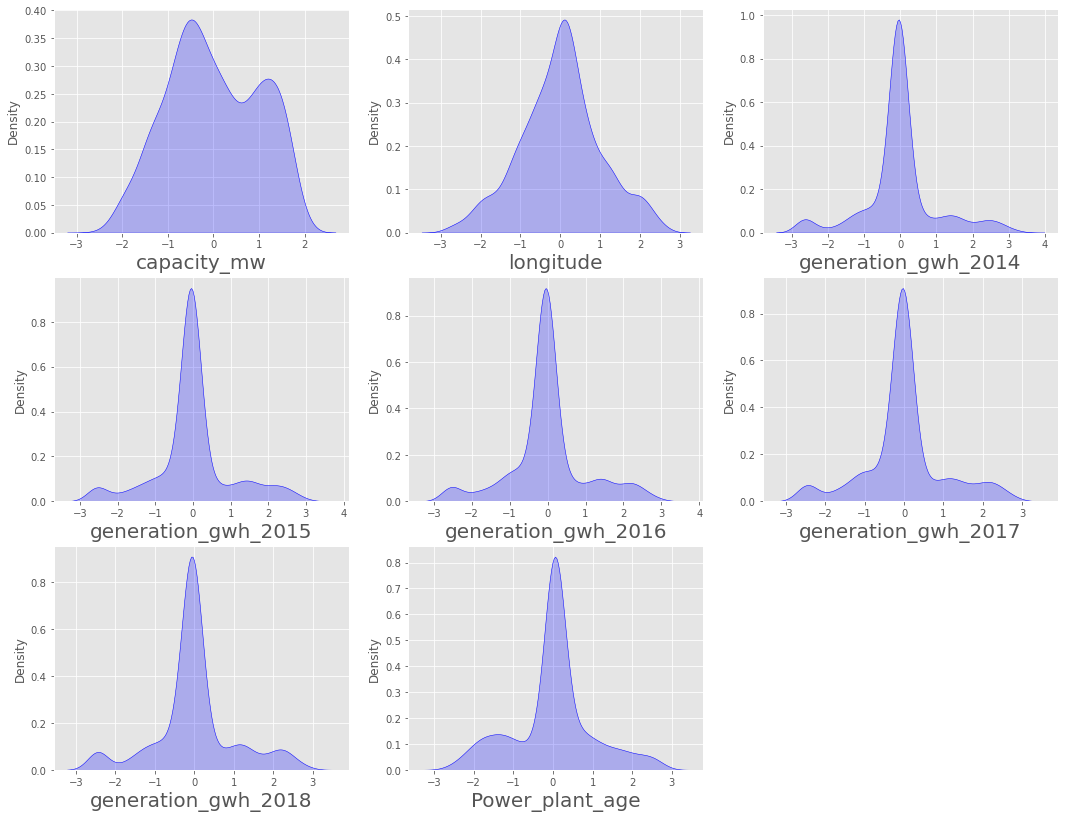

In [60]:
# Distribution of data after removing skewness

plt.figure(figsize=(18,14), facecolor='white')
plotnumber = 1

for column in new_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_df[column],color='blue',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding the Categorical columns

In [61]:
# using Label encoder

catg1_col = [ 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [62]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[catg1_col]= new_df[catg1_col].apply(LE.fit_transform)

In [63]:
new_df[catg1_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


### Correlation between Target Variable and the Independent Variable Using Heat Map

In [64]:
# Checking the correlation
corrl = new_df.corr()
corrl

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.055036,0.341850,-0.526383,-0.042127,-0.398162,0.477762,0.312959,0.332618,0.355046,0.347380,0.357697,-0.249642
latitude,0.055036,1.000000,-0.070519,-0.002561,0.037049,0.069430,-0.203340,0.106490,0.101105,0.119928,0.100945,0.108092,-0.107860
longitude,0.341850,-0.070519,1.000000,-0.412687,0.027311,-0.239483,0.298811,0.035933,0.036708,0.091727,0.080098,0.101508,-0.140482
primary_fuel,-0.526383,-0.002561,-0.412687,1.000000,0.006463,0.038558,-0.478601,-0.139275,-0.156228,-0.173195,-0.158198,-0.171149,0.147068
other_fuel1,-0.042127,0.037049,0.027311,0.006463,1.000000,0.028471,-0.022827,0.011838,0.037533,0.053346,0.020286,0.058954,-0.053771
source,-0.398162,0.069430,-0.239483,0.038558,0.028471,1.000000,-0.497893,-0.022375,-0.024955,-0.023412,-0.017888,-0.029037,-0.002807
geolocation_source,0.477762,-0.203340,0.298811,-0.478601,-0.022827,-0.497893,1.000000,0.017939,0.020008,0.018771,0.014342,0.023281,-0.010004
generation_gwh_2014,0.312959,0.106490,0.035933,-0.139275,0.011838,-0.022375,0.017939,1.000000,0.840179,0.783428,0.712174,0.714425,-0.041461
generation_gwh_2015,0.332618,0.101105,0.036708,-0.156228,0.037533,-0.024955,0.020008,0.840179,1.000000,0.880793,0.771584,0.770922,-0.104850
generation_gwh_2016,0.355046,0.119928,0.091727,-0.173195,0.053346,-0.023412,0.018771,0.783428,0.880793,1.000000,0.895963,0.885985,-0.191482


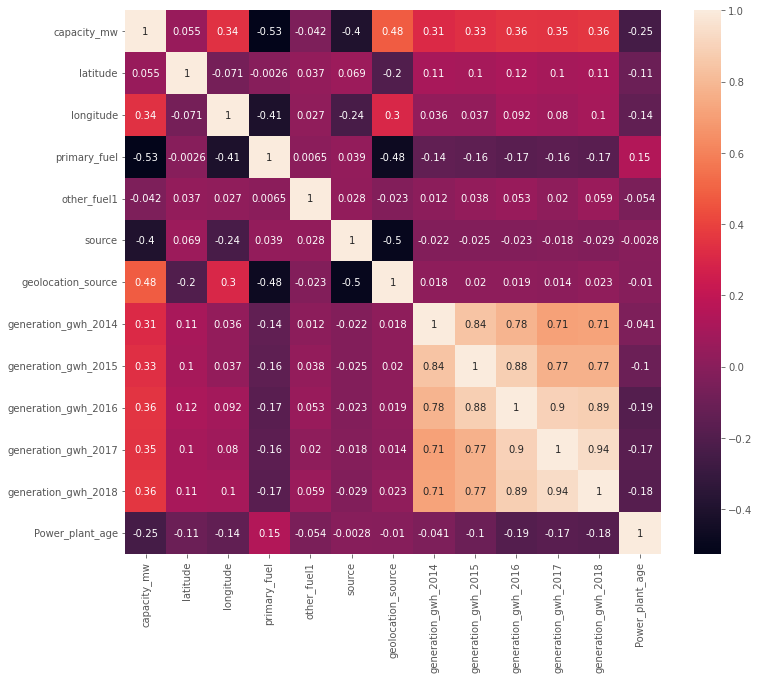

In [65]:
# Visualizing the correlation matrix

plt.figure(figsize=(12,10))
sns.heatmap(new_df.corr(),annot = True)
plt.yticks(rotation =0);


Correlation between primary_fuel and features :

The label Fuel_Type is less correlated with Power_plant_age and source.
The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.
Correlation between capacity_mw and features:

The label capacity_mw is highly positively correlated with the features generation_gwh_2018, features generation_gwh_2017, generation_gwh_2016, generation_gwh_2015, generation_gwh_2014.
And the label is negatively correlated with the feature primary_fuel, source and Power_plant_age.
The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

In [66]:
corrl["primary_fuel"].sort_values(ascending= False)

primary_fuel           1.000000
Power_plant_age        0.147068
source                 0.038558
other_fuel1            0.006463
latitude              -0.002561
generation_gwh_2014   -0.139275
generation_gwh_2015   -0.156228
generation_gwh_2017   -0.158198
generation_gwh_2018   -0.171149
generation_gwh_2016   -0.173195
longitude             -0.412687
geolocation_source    -0.478601
capacity_mw           -0.526383
Name: primary_fuel, dtype: float64

In [67]:
corrl["capacity_mw"].sort_values(ascending= False)

capacity_mw            1.000000
geolocation_source     0.477762
generation_gwh_2018    0.357697
generation_gwh_2016    0.355046
generation_gwh_2017    0.347380
longitude              0.341850
generation_gwh_2015    0.332618
generation_gwh_2014    0.312959
latitude               0.055036
other_fuel1           -0.042127
Power_plant_age       -0.249642
source                -0.398162
primary_fuel          -0.526383
Name: capacity_mw, dtype: float64

### Visualizing the Correlation with the labels and the features

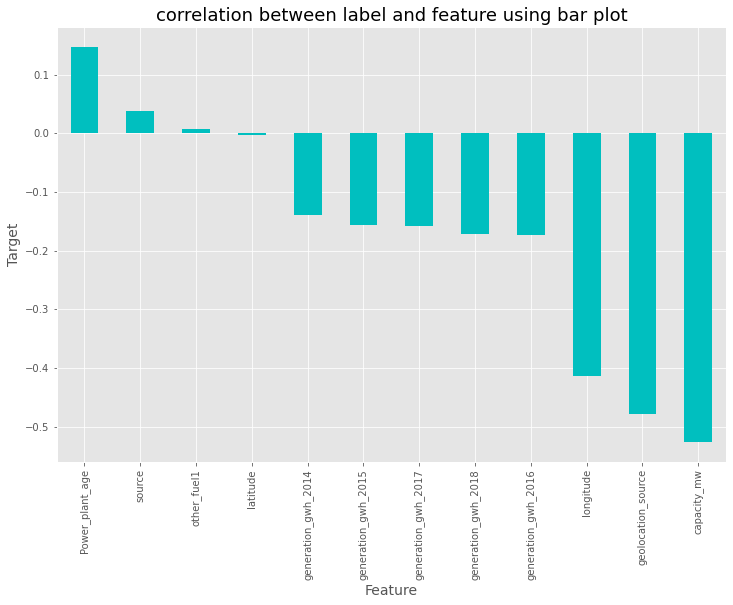

In [68]:
plt.figure(figsize=(12,8))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

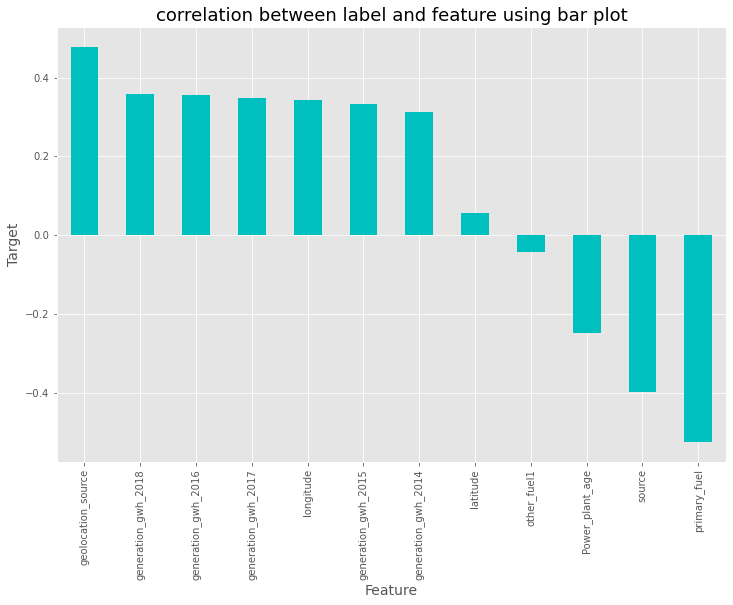

In [69]:
plt.figure(figsize=(12,8))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

Seperating the features and the label variables into x and y

In [70]:
#Droping less correlated column
new_df =new_df.drop(["other_fuel1"],axis=1)
new_df =new_df.drop(["latitude"],axis=1)

In [71]:
x = new_df.drop("primary_fuel", axis=1)
y = new_df["primary_fuel"]

In [72]:
# Dimension of x and y

x.shape

(851, 10)

In [73]:
y.shape

(851,)

### Feature Scaling Using Standard Scalarization

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


### Checking VIF values

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,Power_plant_age


In [76]:
y.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

Balancing the Target variable using oversampling

In [77]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [78]:
y.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

In [79]:
# Data frame after processing and data cleaning
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,6,109,1,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,1,174,2,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,7,21,2,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,2,22,2,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1,22,2,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


### Finding Best Random State and Accuracy

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9353146853146853  on Random_state  57


### Creating Train Test Split 

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [82]:
# Classification Algorithms

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

### Decision Tree Classifier

In [83]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.8793706293706294
[[74  3  0  0  0  1  0  0]
 [ 2 45  5  7  2  1  0  0]
 [ 0  7 54  4  1  4  0  2]
 [ 0  8 10 52  1  1  0  0]
 [ 0  2  1  2 67  0  0  0]
 [ 0  2  3  0  0 60  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        78
           1       0.67      0.73      0.70        62
           2       0.74      0.75      0.74        72
           3       0.80      0.72      0.76        72
           4       0.94      0.93      0.94        72
           5       0.90      0.92      0.91        65
           6       1.00      1.00      1.00        70
           7       0.98      1.00      0.99        81

    accuracy                           0.88       572
   macro avg       0.88      0.88      0.87       572
weighted avg       0.88      0.88      0.88       572



The Accuracy Seems to be 88% using Decision Tree Classifier

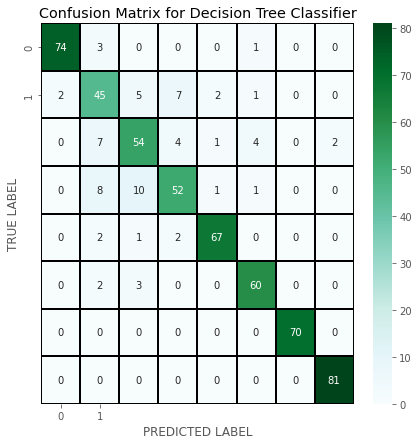

In [84]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,predDTC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

### Random Forest Classifier

In [85]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.9283216783216783
[[77  0  0  0  0  1  0  0]
 [ 2 48  5  4  1  2  0  0]
 [ 0  3 63  2  0  4  0  0]
 [ 0  5  4 60  2  1  0  0]
 [ 0  2  0  0 69  1  0  0]
 [ 0  2  0  0  0 63  0  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        78
           1       0.80      0.77      0.79        62
           2       0.88      0.88      0.88        72
           3       0.91      0.83      0.87        72
           4       0.96      0.96      0.96        72
           5       0.88      0.97      0.92        65
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00        81

    accuracy                           0.93       572
   macro avg       0.92      0.92      0.92       572
weighted avg       0.93      0.93      0.93       572



The accuracy seems to be 93%

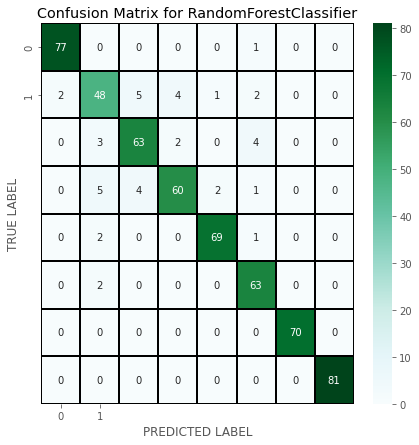

In [86]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

### Logistic Regression

In [87]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7342657342657343
[[69  0  0  1  0  0  0  8]
 [ 5 24  7  5 15  3  0  3]
 [ 2 13 20  9  7 17  0  4]
 [ 0  7  2 40  7  5  0 11]
 [ 0  0  0  0 71  1  0  0]
 [ 3  2  0  1  0 56  0  3]
 [ 0  2  0  0  0  0 68  0]
 [ 0  0  0  9  0  0  0 72]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88        78
           1       0.50      0.39      0.44        62
           2       0.69      0.28      0.40        72
           3       0.62      0.56      0.58        72
           4       0.71      0.99      0.83        72
           5       0.68      0.86      0.76        65
           6       1.00      0.97      0.99        70
           7       0.71      0.89      0.79        81

    accuracy                           0.73       572
   macro avg       0.72      0.73      0.71       572
weighted avg       0.73      0.73      0.71       572



The accuracy using logistic Regression is 73%

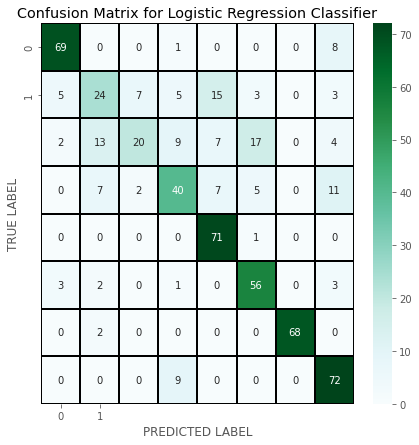

In [88]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predLR)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

### Support Vector Machine Classifier

In [89]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.8234265734265734
[[66  0  0  0  0  0  0 12]
 [ 6 33 10  0  9  1  0  3]
 [ 1  1 51  1  4 12  0  2]
 [ 0  5 10 43  5  0  0  9]
 [ 0  3  0  0 69  0  0  0]
 [ 0  2  0  0  0 59  0  4]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  1  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        78
           1       0.75      0.53      0.62        62
           2       0.71      0.71      0.71        72
           3       0.98      0.60      0.74        72
           4       0.79      0.96      0.87        72
           5       0.82      0.91      0.86        65
           6       1.00      1.00      1.00        70
           7       0.73      0.99      0.84        81

    accuracy                           0.82       572
   macro avg       0.83      0.82      0.81       572
weighted avg       0.84      0.82      0.82       572



The accuracy using SVC is 82%

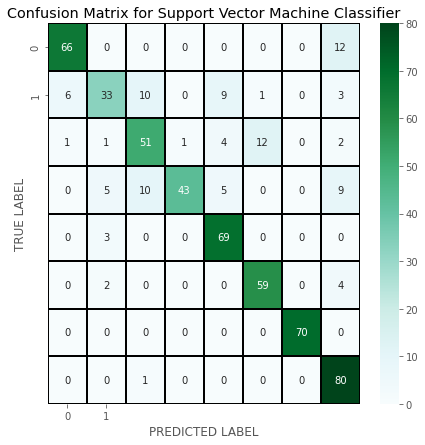

In [90]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

### KNeighbors Classifier

In [91]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8601398601398601
[[73  2  0  0  0  0  0  3]
 [ 7 38  9  2  5  1  0  0]
 [ 1  3 58  0  3  7  0  0]
 [ 0  8 11 45  4  0  0  4]
 [ 0  1  0  1 70  0  0  0]
 [ 1  2  2  0  0 58  0  2]
 [ 0  0  0  0  0  0 70  0]
 [ 1  0  0  0  0  0  0 80]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        78
           1       0.70      0.61      0.66        62
           2       0.72      0.81      0.76        72
           3       0.94      0.62      0.75        72
           4       0.85      0.97      0.91        72
           5       0.88      0.89      0.89        65
           6       1.00      1.00      1.00        70
           7       0.90      0.99      0.94        81

    accuracy                           0.86       572
   macro avg       0.86      0.85      0.85       572
weighted avg       0.86      0.86      0.86       572



The Accuracy using KNeighbors classifier is 86%

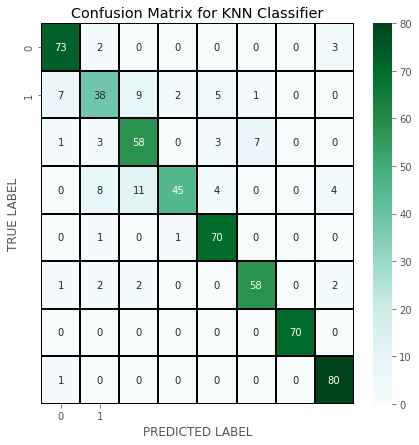

In [92]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_test,predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### Gradient Boosting Classifier

In [93]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.9020979020979021
[[74  3  0  0  0  1  0  0]
 [ 2 49  3  2  6  0  0  0]
 [ 0  3 54  3  3  7  0  2]
 [ 0  7  3 59  2  1  0  0]
 [ 0  4  0  0 67  1  0  0]
 [ 0  1  0  0  0 64  0  0]
 [ 0  2  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        78
           1       0.71      0.79      0.75        62
           2       0.90      0.75      0.82        72
           3       0.92      0.82      0.87        72
           4       0.86      0.93      0.89        72
           5       0.86      0.98      0.92        65
           6       1.00      0.97      0.99        70
           7       0.98      1.00      0.99        81

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.91      0.90      0.90       572



The accuracy using GBC is 90%

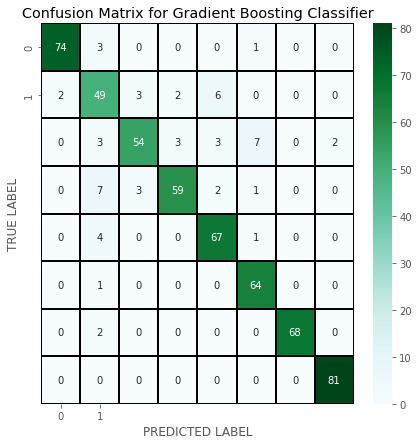

In [94]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### AdaBoost Classifier

In [95]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.25874125874125875
[[ 0  1  0  0  0 77  0  0]
 [ 0 17  0  0  0 45  0  0]
 [ 0  7  0  0  0 65  0  0]
 [ 0  3  0  0  0 69  0  0]
 [ 0  5  0  0  0 67  0  0]
 [ 0  2  0  0  0 63  0  0]
 [ 0  0  0  0  0  2 68  0]
 [ 0 81  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.15      0.27      0.19        62
           2       0.00      0.00      0.00        72
           3       0.00      0.00      0.00        72
           4       0.00      0.00      0.00        72
           5       0.16      0.97      0.28        65
           6       1.00      0.97      0.99        70
           7       0.00      0.00      0.00        81

    accuracy                           0.26       572
   macro avg       0.16      0.28      0.18       572
weighted avg       0.16      0.26      0.17       572



The Accuracy using ABC is 26%

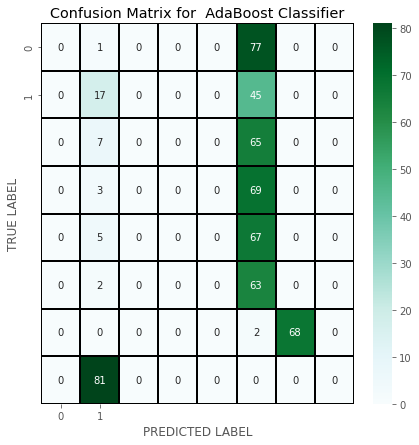

In [96]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predABC)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

### Gaussian NB Classifier

In [97]:
# Checking accuracy for GaussianNB Classifier
NB = GaussianNB()
NB.fit(x_train,y_train)

# Prediction
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.6258741258741258
[[78  0  0  0  0  0  0  0]
 [13 11  0 19 18  0  1  0]
 [13  0  3 53  1  2  0  0]
 [ 1  0  0 50  4  0 17  0]
 [ 0  3  5 17 47  0  0  0]
 [18  0  0 23  0 18  6  0]
 [ 0  0  0  0  0  0 70  0]
 [ 0  0  0  0  0  0  0 81]]
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        78
           1       0.79      0.18      0.29        62
           2       0.38      0.04      0.07        72
           3       0.31      0.69      0.43        72
           4       0.67      0.65      0.66        72
           5       0.90      0.28      0.42        65
           6       0.74      1.00      0.85        70
           7       1.00      1.00      1.00        81

    accuracy                           0.63       572
   macro avg       0.68      0.61      0.56       572
weighted avg       0.68      0.63      0.58       572



The accuracy seems to be 63 %

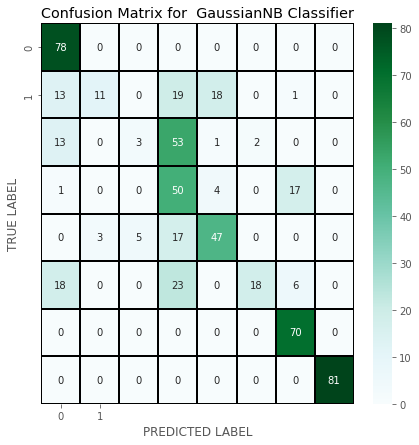

In [98]:
# Lets plot confusion matrix for  Gaussian nb Classifier
cm = confusion_matrix(y_test,predNB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  GaussianNB Classifier')
plt.show()

### Checking the Cross validation score

In [99]:
from sklearn.model_selection import cross_val_score
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8802445089100704


In [100]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9154385964912282


In [101]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7305732836027075


In [102]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.8056706727448543


In [103]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.8576640419947508


In [104]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.8975811576184556


In [105]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.29990053874844597


In [106]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB,x,y,cv=5).mean())

0.5976930515264539


### Hyper Parameter Tuning

In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
#Gradient Boosting Classifier 
parameters = {'criterion':['friedman_mse','mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [109]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)


In [110]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [111]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [113]:
primary_fuel =GradientBoostingClassifier (criterion='friedman_mse', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_train, y_train)
pred = primary_fuel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.88111888111888


### ROC-AUC Curve

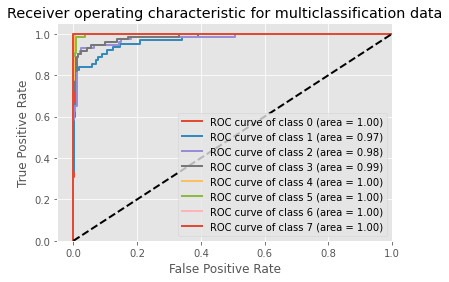

In [114]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(primary_fuel)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

### Saving the model

In [115]:
#Saving the model as .pkl file
import joblib
joblib.dump(primary_fuel,"power_plant_primary_fuel.pkl")

['power_plant_primary_fuel.pkl']

### 2 Prediction for Capavity_mw

#### Separating the features and label variables into x and y

In [116]:
x1 = new_df.drop("capacity_mw", axis=1)
y1 = new_df["capacity_mw"]

In [117]:
# Dimension of x
x1.shape

(851, 10)

In [118]:
# Dimension of y
y1.shape

(851,)

### Checking for skewness

In [119]:
# Checking the skewness
x1.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.037156
dtype: float64

#### Removing Skewness

In [120]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew1 = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [121]:
x1[skew1] = scaler.fit_transform(x1[skew1].values)
x1[skew1].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922017,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.090824
1,-0.499922,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
2,-2.377221,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
3,2.431155,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.249029
4,1.262070,1.395779,2.192289,2.187260,1.925736,2.254026,-1.761957


In [122]:
# Checking skewness after using yeo-johnson ethod
x1.skew()

longitude              0.000632
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014   -0.104472
generation_gwh_2015   -0.094369
generation_gwh_2016   -0.088905
generation_gwh_2017   -0.069609
generation_gwh_2018   -0.090533
Power_plant_age        0.056495
dtype: float64

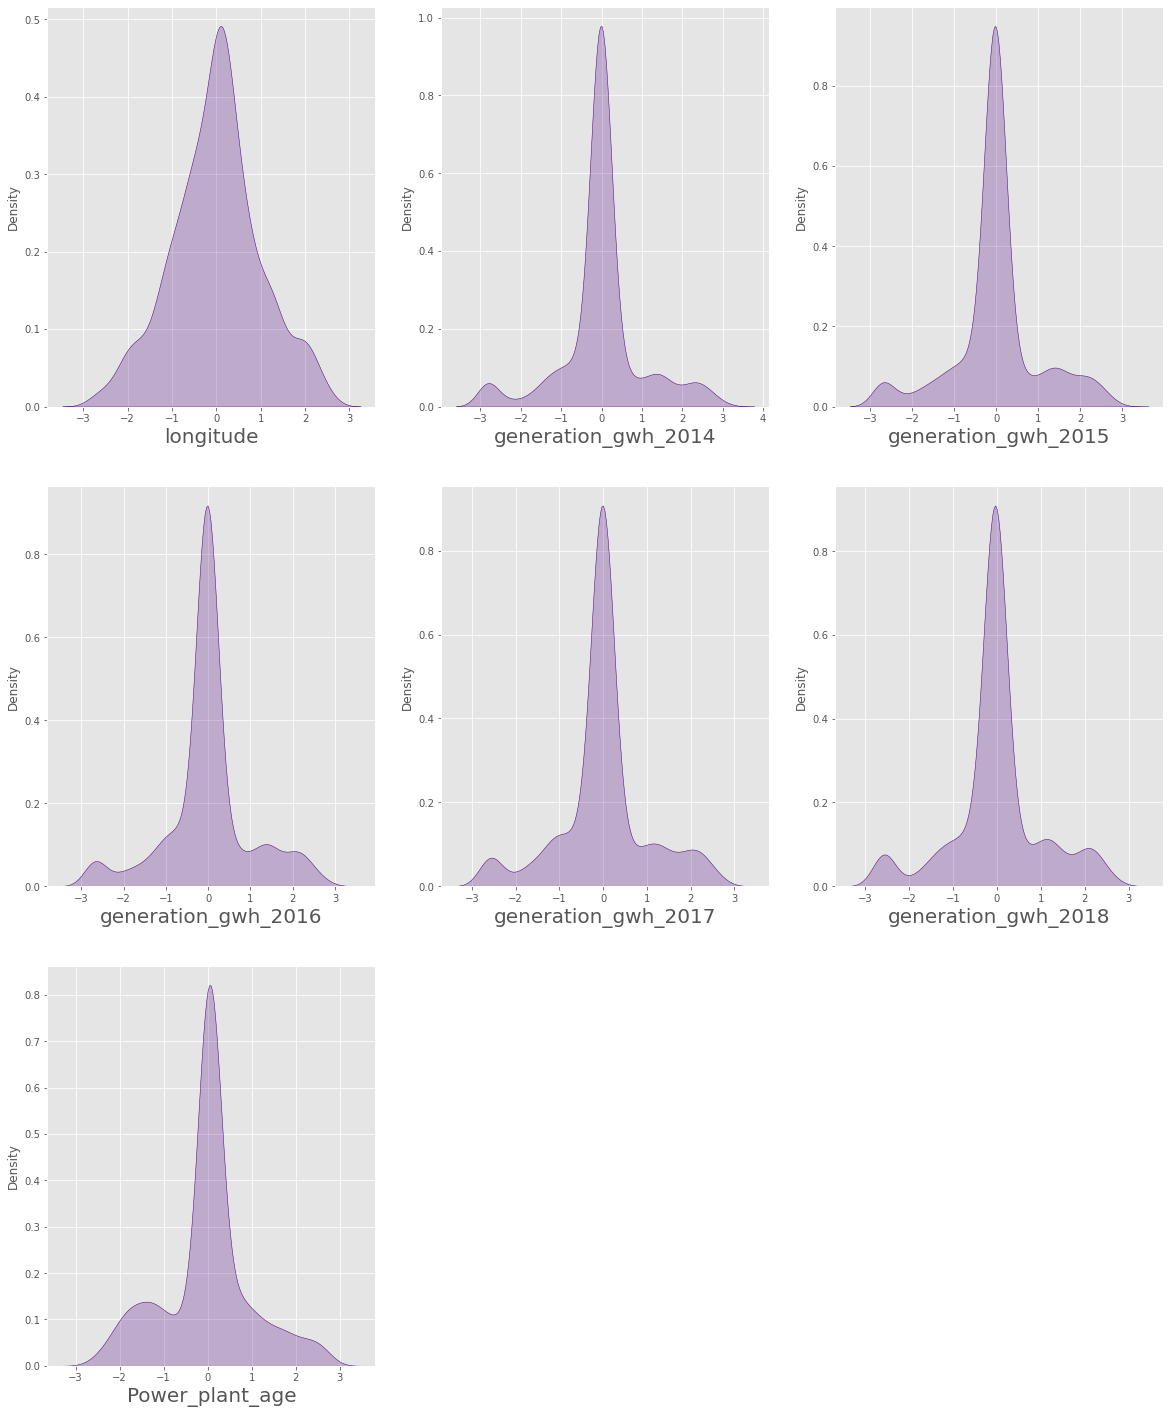

In [123]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x1[skew1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x1[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Feature Scaling using Standard Scalarization

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1


,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922017,1.175506,1.397951,-1.036523,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.090824
1,-0.499922,-0.975797,2.821796,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
2,-2.377221,1.605767,-0.529717,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
3,2.431155,-0.545536,-0.507812,0.407145,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.249029
4,1.262070,-0.975797,-0.507812,0.407145,1.395779,2.192289,2.187260,1.925736,2.254026,-1.761957
...,...,...,...,...,...,...,...,...,...,...
846,0.231807,-0.975797,-0.507812,0.407145,-0.015816,-2.588699,-0.840417,0.032040,-0.102890,-1.975973
847,0.421487,1.175506,0.696980,-2.480190,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
848,-0.224526,1.605767,-0.529717,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
849,-0.760667,-0.975797,0.302685,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548


### Checking VIF Values

In [125]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x1.values,i)
              for i in range(len(x1.columns))]
vif["Features"] = x1.columns

# Let's check the values
vif

,VIF values,Features
0,1.310007,longitude
1,1.675863,primary_fuel
2,1.501219,source
3,1.874728,geolocation_source
4,3.424556,generation_gwh_2014
5,5.802701,generation_gwh_2015
6,9.491737,generation_gwh_2016
7,8.992422,generation_gwh_2017
8,8.446106,generation_gwh_2018
9,1.098973,Power_plant_age


In [126]:
# DataFrame after preprocessing and data cleaning
x1.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922017,1.175506,1.397951,-1.036523,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,-1.090824
1,-0.499922,-0.975797,2.821796,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
2,-2.377221,1.605767,-0.529717,0.407145,-0.015816,-0.023850,-0.021809,-0.014102,-0.033504,0.045548
3,2.431155,-0.545536,-0.507812,0.407145,-0.244117,0.119032,0.129852,-0.179899,-0.171808,-0.249029
4,1.262070,-0.975797,-0.507812,0.407145,1.395779,2.192289,2.187260,1.925736,2.254026,-1.761957


#### Finding best Random State

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [128]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x1_train, y1_train)
    pred = mod.predict(x1_test)
    acc=r2_score(y1_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8422761891187404  on Random_state  15


#### Creating new train test split

In [129]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=maxRS)

### Regression Algorithms

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

### Random Forest Regressor

In [131]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x1_train,y1_train)

# prediction
predRFR=RFR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y1_test, predRFR))
print('MSE:',metrics.mean_squared_error(y1_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predRFR)))

R2_Score: 0.8425073684098243
MAE: 0.28827235102028737
MSE: 0.16008526872685072
RMSE: 0.40010657171165126


### Decision Tree Regressor

In [132]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x1_train,y1_train)

# prediction
predDTR=DTR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y1_test, predDTR))
print('MSE:',metrics.mean_squared_error(y1_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predDTR)))

R2_Score: 0.6990088055844299
MAE: 0.40840738744587113
MSE: 0.3059460989122109
RMSE: 0.553123945343366


### Stochastic KNN Regressor

In [133]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x1_train,y1_train)

# prediction
predknn=knn.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predknn))
print('MAE:',metrics.mean_absolute_error(y1_test, predknn))
print('MSE:',metrics.mean_squared_error(y1_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predknn)))

R2_Score: 0.7584486966296287
MAE: 0.35508367800657153
MSE: 0.2455277108581826
RMSE: 0.49550752855853014


### Gradient Boosting Regressor

In [134]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x1_train,y1_train)

# prediction
predGB=GB.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predGB))
print('MAE:',metrics.mean_absolute_error(y1_test, predGB))
print('MSE:',metrics.mean_squared_error(y1_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predGB)))

R2_Score: 0.8424520873145427
MAE: 0.29259229286807553
MSE: 0.16014145985721862
RMSE: 0.4001767857550193


### BaggingRegressor

In [135]:
# Checking R2 score for BaggingRegressor
BR=BaggingRegressor()
BR.fit(x1_train,y1_train)

# prediction
predBR=BR.predict(x1_test)
print('R2_Score:',r2_score(y1_test,predBR))
print('MAE:',metrics.mean_absolute_error(y1_test, predBR))
print('MSE:',metrics.mean_squared_error(y1_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y1_test, predBR)))

R2_Score: 0.8347952072415299
MAE: 0.2975130176562581
MSE: 0.1679243871708414
RMSE: 0.4097857820506239


### Checking the cross validation score

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x1,y1,cv=5).mean())

0.7793537958719727


In [138]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x1,y1,cv=5).mean())

0.6181710790185113


In [139]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x1,y1,cv=5).mean())

0.6889541782363763


In [140]:
# Checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x1,y1,cv=5).mean())

0.7966571435720561


In [141]:
# Checking cv score for Bagging Regressor
print(cross_val_score(BR,x1,y1,cv=5).mean())

0.7656659764238881


### Hyperparameter tuning

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
#KNeighborsRegressor
parameters = {'n_neighbors':[2,3,4,5,6],
             'algorithm':['auto','ball_tree','kd_tree','brute'],
             'leaf_size':[10,20,30,40,50],
             'weights':['uniform','distance']}

In [144]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [145]:
GCV.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [146]:
GCV.best_params_

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 5, 'weights': 'uniform'}

In [147]:
capacity = KNN(algorithm='auto', leaf_size=30, n_neighbors=5, weights='distance')
capacity.fit(x1_train, y1_train)
pred = capacity.predict(x1_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y1_test, predRFR)))
print('R2_Score:',r2_score(y1_test,pred)*100)

RMSE value: 0.40010657171165126
R2_Score: 76.78872864714644


### Saving the model

In [148]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']